### 좌표 클러스터링(only 좌표)

In [80]:
#라이브러리 로드
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')
import requests 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

#한글 폰트 - 주피터
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    # Mac인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False 

In [81]:
#데이터 로드
%cd /Users/diekim/Desktop/ETC/SMAC
df = pd.read_csv('항로별+Co2+Nox+발생량+데이터+셋.csv')
df = df[df['CDBX']!=0]
#df.to_csv('항로별 전처리.csv', encoding='utf-8-sig', index=False)
df.rename(columns={'LA': 'x', 'LO': 'y'}, inplace=True)

/Users/diekim/Desktop/ETC/SMAC


In [83]:
#Silhouette 분석 
range_n_clusters = range(5, 10)

for n_clusters in range_n_clusters:
    clusterer = KMeans(n_clusters=n_clusters,
                       max_iter=1000,
                       n_init=10)
    preds = clusterer.fit_predict(df[['x','y']])
    centers = clusterer.cluster_centers_

    score = silhouette_score(df[['x','y']], preds)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, round(score, 4)))

In [84]:
#K-Means 클러스터링
model = KMeans(n_clusters=5)
model.fit(df[['x','y']])
y_predict = model.fit_predict(df[['x','y']])
df['cluster'] = y_predict

<AxesSubplot:xlabel='x', ylabel='y'>

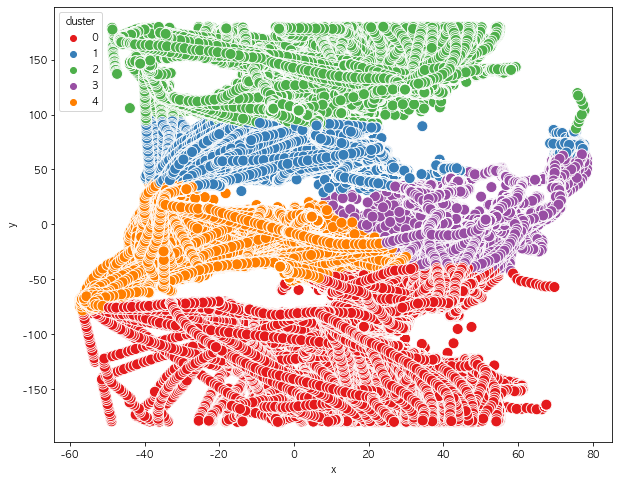

In [85]:
#시각화
fig, ax = plt.subplots(figsize=(10, 8))
sns.scatterplot(ax=ax, 
                data=df, 
                x="x", 
                y="y",
                hue='cluster', 
                palette='Set1', 
                s=120)

In [56]:
df.to_csv('좌표클러스터5.csv', encoding='utf-8-sig', index=False)

### 좌표 클러스터링(with 해양특성)

In [86]:
#라이브러리 로드
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')
import requests 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import scipy.cluster.hierarchy as shc

In [87]:
#데이터 로드
%cd /Users/diekim/Desktop/ETC/SMAC
df = pd.read_csv('항로별 전처리.csv')
df.rename(columns={'LA': 'x', 'LO': 'y'}, inplace=True)

/Users/diekim/Desktop/ETC/SMAC


In [89]:
#함수 정의
### 실루엣 계수 시각화 함수: 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 실루엣 계수를 면적으로 시각화한 함수 작성
def visualize_silhouette(cluster_lists, X_features): 
    
    from sklearn.datasets import make_blobs
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_samples, silhouette_score

    import matplotlib.pyplot as plt
    import matplotlib.cm as cm
    import math
    
    # 입력값으로 클러스터링 갯수들을 리스트로 받아서, 각 갯수별로 클러스터링을 적용하고 실루엣 개수를 구함
    n_cols = len(cluster_lists)
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 수만큼의 sub figures를 가지는 axs 생성 
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 실루엣 개수 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링 수행하고, 실루엣 스코어와 개별 데이터의 실루엣 값 계산. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(X_features)
        
        sil_avg = silhouette_score(X_features, cluster_labels)
        sil_values = silhouette_samples(X_features, cluster_labels)
        
        y_lower = 10
        axs[ind].set_title('Number of Cluster : '+ str(n_cluster)+'\n' \
                          'Silhouette Score :' + str(round(sil_avg,3)) )
        axs[ind].set_xlabel("The silhouette coefficient values")
        axs[ind].set_ylabel("Cluster label")
        axs[ind].set_xlim([-0.1, 1])
        axs[ind].set_ylim([0, len(X_features) + (n_cluster + 1) * 10])
        axs[ind].set_yticks([])  # Clear the yaxis labels / ticks
        axs[ind].set_xticks([0, 0.2, 0.4, 0.6, 0.8, 1])
        
        # 클러스터링 갯수별로 fill_betweenx( )형태의 막대 그래프 표현. 
        for i in range(n_cluster):
            ith_cluster_sil_values = sil_values[cluster_labels==i]
            ith_cluster_sil_values.sort()
            
            size_cluster_i = ith_cluster_sil_values.shape[0]
            y_upper = y_lower + size_cluster_i
            
            color = cm.nipy_spectral(float(i) / n_cluster)
            axs[ind].fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values, \
                                facecolor=color, edgecolor=color, alpha=0.7)
            axs[ind].text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
            y_lower = y_upper + 10
            
        axs[ind].axvline(x=sil_avg, color="red", linestyle="--")
        
### 군집별 시각화 함수: 여러개의 클러스터링 갯수를 List로 입력 받아 각각의 클러스터링 결과를 시각화 
def visualize_kmeans_plot_multi(cluster_lists, X_features):
    
    from sklearn.cluster import KMeans
    from sklearn.decomposition import PCA
    import pandas as pd
    import numpy as np
    
    # plt.subplots()으로 리스트에 기재된 클러스터링 만큼의 sub figures를 가지는 axs 생성 
    n_cols = len(cluster_lists)
    fig, axs = plt.subplots(figsize=(4*n_cols, 4), nrows=1, ncols=n_cols)
    
    # 입력 데이터의 FEATURE가 여러개일 경우 2차원 데이터 시각화가 어려우므로 PCA 변환하여 2차원 시각화
    pca = PCA(n_components=2)
    pca_transformed = pca.fit_transform(X_features)
    dataframe = pd.DataFrame(pca_transformed, columns=['PCA1','PCA2'])
    
     # 리스트에 기재된 클러스터링 갯수들을 차례로 iteration 수행하면서 KMeans 클러스터링 수행하고 시각화
    for ind, n_cluster in enumerate(cluster_lists):
        
        # KMeans 클러스터링으로 클러스터링 결과를 dataframe에 저장. 
        clusterer = KMeans(n_clusters = n_cluster, max_iter=500, random_state=0)
        cluster_labels = clusterer.fit_predict(pca_transformed)
        dataframe['cluster']=cluster_labels
        
        unique_labels = np.unique(clusterer.labels_)
        markers=['o', 's', '^', 'x', '*','d','+']
       
        # 클러스터링 결과값 별로 scatter plot 으로 시각화
        for label in unique_labels:
            label_df = dataframe[dataframe['cluster']==label]
            if label == -1:
                cluster_legend = 'Noise'
            else :
                cluster_legend = 'Cluster '+str(label)           
            axs[ind].scatter(x=label_df['PCA1'], y=label_df['PCA2'], s=70,\
                        edgecolor='k', marker=markers[label], label=cluster_legend)

        axs[ind].set_title('Number of Cluster : '+ str(n_cluster))    
        axs[ind].legend(loc='upper right')
    
    plt.show()

<AxesSubplot:>

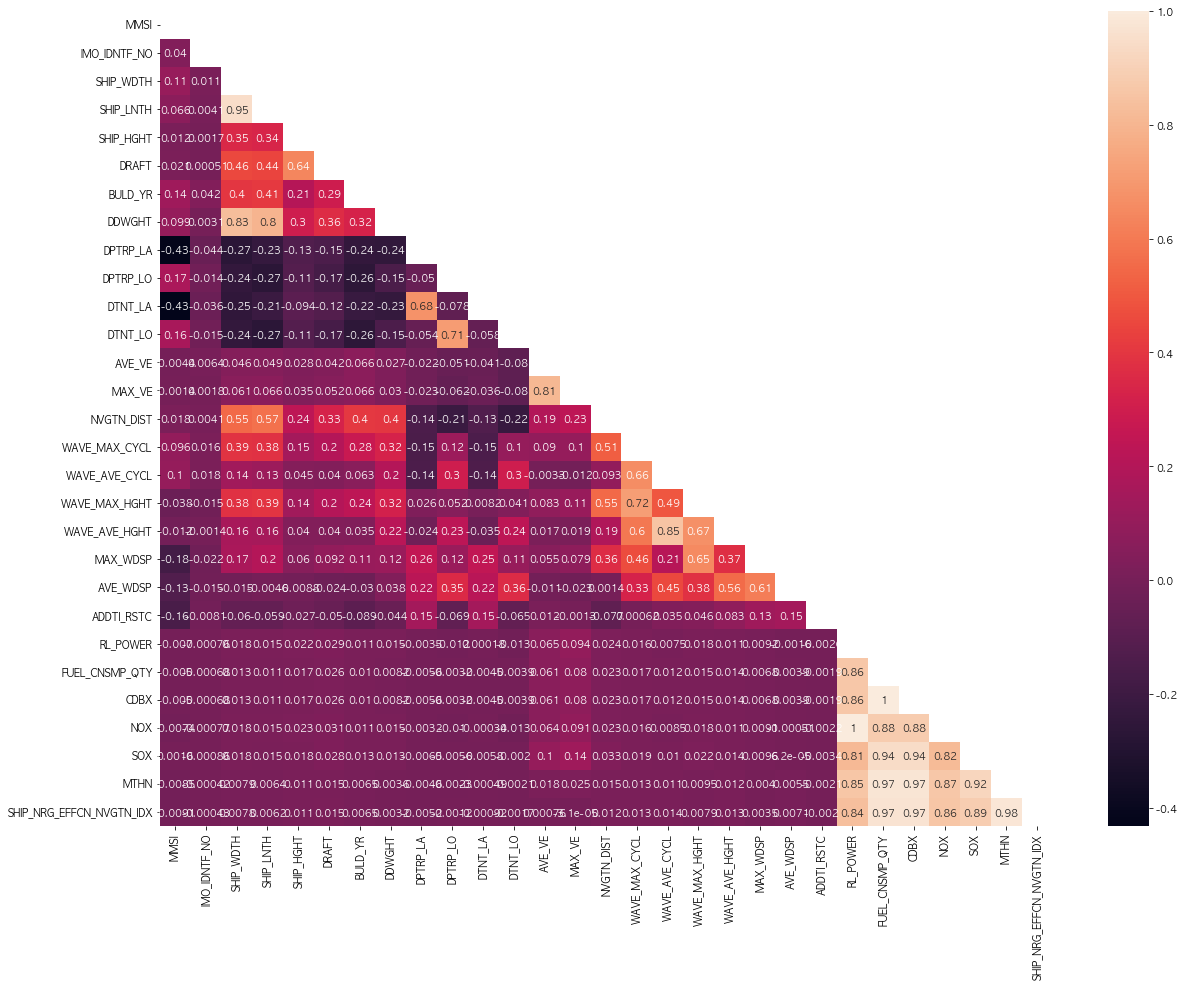

In [74]:
#상관관계 확인
plt.figure(figsize=(20,15))
corr = 선박.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, 
            annot=True,
            mask=mask)

실루엣 스코어: 0.400


IndexError: list index out of range

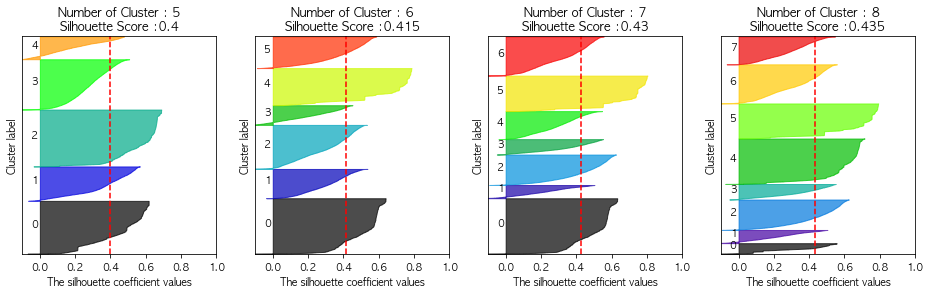

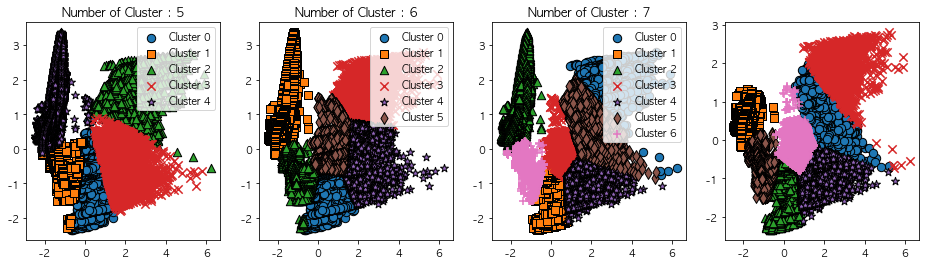

In [95]:
#클러스터링
features = ['x', 'y', 'WAVE_HGHT', 'WAVE_CYCL']
df = df[features]

# ##1. 원데이터 
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_samples, silhouette_score

# X_features = df.values

# # KMeans
# kmeans = KMeans(n_clusters=5, random_state=0)
# labels = kmeans.fit_predict(X_features)
# df["cluster_label"] = labels

# # 실루엣 스코어
# silhouette_kmeans = silhouette_score(X_features, labels)
# print(f"실루엣 스코어: {silhouette_kmeans:.3f}")

# visualize_silhouette([5,6,7,8,9,10], X_features)
# visualize_kmeans_plot_multi([5,6,7,8,9,10], X_features)

##2. StandardScaler
from sklearn.preprocessing import StandardScaler

# StandardScaler
X_features = df.values
X_features_scaled = StandardScaler().fit_transform(X_features)

# KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
labels = kmeans.fit_predict(X_features_scaled)
df["cluster_label"] = labels

# 실루엣 스코어
silhouette_kmeans = silhouette_score(X_features_scaled, labels)
print(f"실루엣 스코어: {silhouette_kmeans:.3f}")

visualize_silhouette([5,6,7,8], X_features_scaled)
visualize_kmeans_plot_multi([5,6,7,8], X_features_scaled)

5    5806
2    4649
3    4392
4    2962
0    2111
1    2060
Name: cluster_label, dtype: int64


,x,y,WAVE_HGHT,WAVE_CYCL,WNDRC_U,WNDRC_V
cluster_label,,,,,,
0,29.381791,78.302829,2.558029,9.186072,7.460024,2.952603
1,33.309627,113.958603,1.833786,7.459928,-3.269818,-6.284540
2,53.442494,13.406777,0.894375,5.541393,0.559165,-0.236687
3,11.973363,52.764198,1.118809,12.719364,1.214280,0.215720
4,-22.167267,35.523127,2.647846,12.956879,-3.237323,2.590204
5,29.990525,121.988906,0.645126,4.870549,0.236845,1.019846


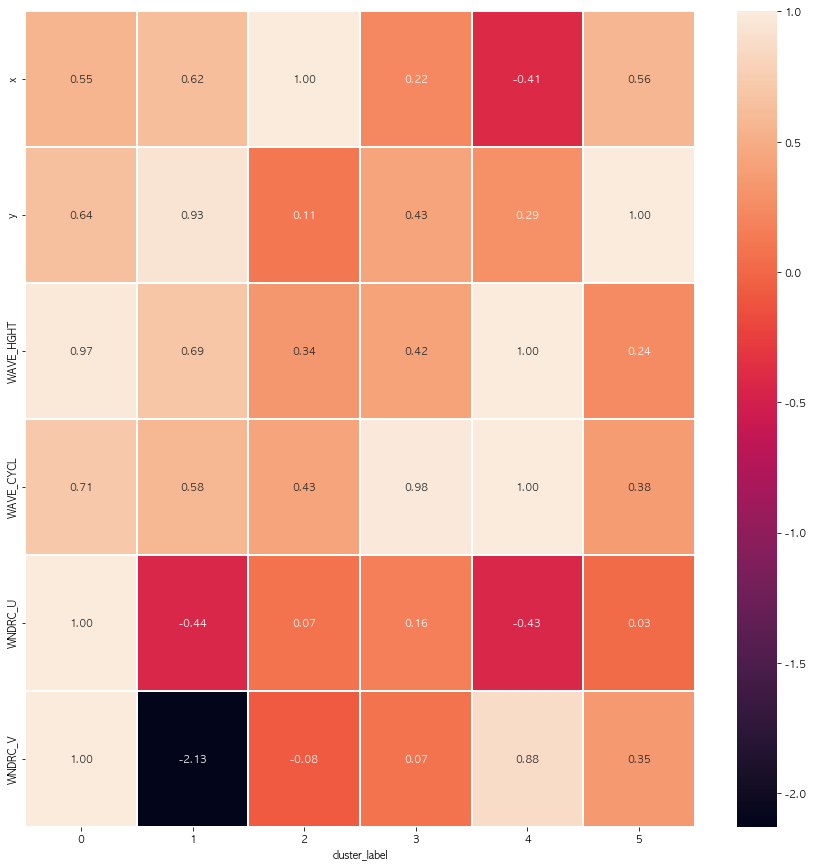

In [50]:
#클러스터링 결과 분석
print(df['cluster_label'].value_counts())
display(df.groupby('cluster_label').mean())
temp = df.groupby(['cluster_label']).mean()
cluster_mean = temp.transpose()
mean_table = cluster_mean.div(cluster_mean.max(axis=1), axis=0)
df.to_csv('cluster6.csv', encoding='utf-8-sig')
fig = plt.figure(figsize=(15, 15))
sns.heatmap(mean_table, annot=True, fmt ='.2f', linewidths=0.1)
plt.show()

### 해양 라벨링

In [126]:
#라이브러리 로드
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')

#한글 폰트 - 주피터
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    # Mac인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False 

In [175]:
#데이터 로드
df = pd.read_csv('좌표클러스터5.csv')
df

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,ADDTI_RSTC,TOT_RSTC,RL_POWER,FUEL_CNSMP_QTY,CDBX,NOX,SOX,MTHN,SHIP_NRG_EFFCN_NVGTN_IDX,cluster
0,01-Jan-2021 00:00:00,100000001,2.814960,9.831160,0.000239,209,7924932,0.0,0.1,2.65498,...,17063300.0,15.8726,2.000000e-01,3.000000e-01,0.4,0.5,0.6,0.7,0.80000,3
1,05-Mar-2021 00:00:00,205082000,-32.244499,29.655701,10.105200,218,9877779,0.0,0.0,112289.00000,...,20011900.0,516570000.0,6.651510e+09,6.701300e+09,20867.8,494120.0,34063.7,29065.9,1.11038,3
2,05-Mar-2021 06:00:00,205082000,-30.139999,31.688801,9.021080,217,9877779,0.0,0.0,100242.00000,...,20011900.0,516570000.0,6.651510e+09,6.701300e+09,20867.8,494120.0,34063.7,29065.9,1.11038,3
3,05-Mar-2021 12:00:00,205082000,-30.825800,31.037800,8.872930,216,9877779,0.0,0.0,98596.20000,...,20011900.0,516570000.0,6.651510e+09,6.701300e+09,20867.8,494120.0,34063.7,29065.9,1.11038,3
4,05-Mar-2021 18:00:00,205082000,-31.464600,30.409800,8.371850,212,9877779,0.0,0.0,93028.20000,...,20011900.0,516570000.0,6.651510e+09,6.701300e+09,20867.8,494120.0,34063.7,29065.9,1.11038,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1862120,30-Jul-2021 12:00:00,538004968,-3.653230,-38.412601,0.043158,96,9539925,0.0,0.0,479.57000,...,149642000.0,137357000.0,1.107800e+10,1.129960e+10,35186.9,3445710.0,11045.7,47857.1,8.68708,3
1862121,30-Jul-2021 18:00:00,538004968,-3.653270,-38.412399,0.103410,0,9539925,0.0,0.0,1149.09000,...,149642000.0,137357000.0,1.107800e+10,1.129960e+10,35186.9,3445710.0,11045.7,47857.1,8.68708,3
1862122,31-Jul-2021 06:00:00,538004968,-3.709630,-38.483501,1.397210,165,9539925,0.0,0.0,15525.80000,...,149642000.0,137357000.0,1.107800e+10,1.129960e+10,35186.9,3445710.0,11045.7,47857.1,8.68708,3
1862123,31-Jul-2021 12:00:00,538004968,-3.708660,-38.483398,0.016546,165,9539925,0.0,0.0,183.86200,...,149642000.0,137357000.0,1.107800e+10,1.129960e+10,35186.9,3445710.0,11045.7,47857.1,8.68708,3


In [176]:
#클러스터-해양 라벨링
df['cluster'].replace([0, 1, 2, 3, 4], ['북대서양', '태평양', '인도양', '남대서양', '태평양'], inplace=True)
df.loc[(df['x']>=4.23) & (df['x']<=21.25) & (df['y']>=116.55) & (df['y']<=126.34) , 'cluster'] = '필리핀해' 
df.cluster.value_counts()

태평양     818184
북대서양    439091
인도양     395048
남대서양    202229
필리핀해      7573
Name: cluster, dtype: int64

* 0: 북대서양
* 1: 태평양
* 2: 인도양
* 3: 남대서양
* 4: 동남아+태평양 -> 추가처리

In [178]:
df.to_csv('좌표클러스터_최종.csv', encoding='utf-8-sig', index=False)

### 항로/선박 데이터 병합

In [ ]:
#라이브러리 로드
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')

#한글 폰트 - 주피터
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    # Mac인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False 

In [ ]:
#선박 전처리
선박 = pd.read_csv('선박별+Co2+Nox+발생량+데이터+셋.csv')
선박 = 선박[(선박['CDBX']!=0) & (선박['SHIP_WDTH'] !=0) & (선박['DDWGHT']!=0)]
선박.to_csv('선박별 전처리.csv', encoding='utf-8-sig', index=False)

In [220]:
#데이터 로드
항로 = pd.read_csv('좌표클러스터_최종.csv')
선박 = pd.read_csv('선박별 전처리.csv')
print(항로.shape)
print(선박.shape)

(1862125, 24)
(4810, 36)


In [221]:
#데이터 병합
선박 = 선박[['SHIP_NM', 'SHIP_KIND', 'SHIP_WDTH', 'SHIP_LNTH', 'SHIP_HGHT', #'IMO_IDNTF_NO',
           'BULD_YR', 'DDWGHT', 'AVE_VE', 'MAX_VE', 'WAVE_MAX_CYCL', 'MMSI',
           'WAVE_AVE_CYCL', 'WAVE_MAX_HGHT', 'WAVE_AVE_HGHT', 'MAX_WDSP', 'AVE_WDSP']]
df = pd.merge(항로, 선박, on='MMSI', how='inner')
df.to_csv("항로선박병합.csv", encoding='utf-8-sig', index=False)
df

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,BULD_YR,DDWGHT,AVE_VE,MAX_VE,WAVE_MAX_CYCL,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP
0,01-Jan-2021 00:00:00,205517000,-33.593399,-11.850000,11.278000,104,9380738,0.0,0.0,125321.000,...,2008,158765,11.3040,15.0707,20.4082,5.04549,7.10,0.708568,19.8878,3.00217
1,23-Jan-2021 12:00:00,205517000,7.361150,67.215797,10.939100,0,9380738,0.0,0.0,121556.000,...,2008,158765,11.3040,15.0707,20.4082,5.04549,7.10,0.708568,19.8878,3.00217
2,23-Jan-2021 18:00:00,205517000,8.453450,67.288696,10.954500,1,9380738,0.0,0.0,121726.000,...,2008,158765,11.3040,15.0707,20.4082,5.04549,7.10,0.708568,19.8878,3.00217
3,24-Jan-2021 00:00:00,205517000,14.178800,67.649498,11.038500,5,9380738,0.0,0.0,122660.000,...,2008,158765,11.3040,15.0707,20.4082,5.04549,7.10,0.708568,19.8878,3.00217
4,24-Jan-2021 06:00:00,205517000,10.748500,67.440201,11.589500,3,9380738,0.0,0.0,128782.000,...,2008,158765,11.3040,15.0707,20.4082,5.04549,7.10,0.708568,19.8878,3.00217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782292,30-Jul-2021 12:00:00,538004968,-3.653230,-38.412601,0.043158,96,9539925,0.0,0.0,479.570,...,2013,49997,10.4192,13.9904,18.8679,4.34338,7.93,0.685479,31.9696,3.94028
1782293,30-Jul-2021 18:00:00,538004968,-3.653270,-38.412399,0.103410,0,9539925,0.0,0.0,1149.090,...,2013,49997,10.4192,13.9904,18.8679,4.34338,7.93,0.685479,31.9696,3.94028
1782294,31-Jul-2021 06:00:00,538004968,-3.709630,-38.483501,1.397210,165,9539925,0.0,0.0,15525.800,...,2013,49997,10.4192,13.9904,18.8679,4.34338,7.93,0.685479,31.9696,3.94028
1782295,31-Jul-2021 12:00:00,538004968,-3.708660,-38.483398,0.016546,165,9539925,0.0,0.0,183.862,...,2013,49997,10.4192,13.9904,18.8679,4.34338,7.93,0.685479,31.9696,3.94028


### 기초 통계분석

In [ ]:
#라이브러리 로드
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings 
warnings.filterwarnings(action='ignore')

#한글 폰트 - 주피터
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    # 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
    # Mac인 경우
    rc('font', family='AppleGothic')

matplotlib.rcParams['axes.unicode_minus'] = False 

In [228]:
#데이터 로드
df = pd.read_csv('항로선박병합.csv')
df

,YMD,MMSI,x,y,VE,SH_DRCN,IMO_IDNTF_NO,DRAFT,CRG_TYP,NVGTN_DIST,...,BULD_YR,DDWGHT,AVE_VE,MAX_VE,WAVE_MAX_CYCL,WAVE_AVE_CYCL,WAVE_MAX_HGHT,WAVE_AVE_HGHT,MAX_WDSP,AVE_WDSP
0,01-Jan-2021 00:00:00,205517000,-33.593399,-11.850000,11.278000,104,9380738,0.0,0.0,125321.000,...,2008,158765,11.3040,15.0707,20.4082,5.04549,7.10,0.708568,19.8878,3.00217
1,23-Jan-2021 12:00:00,205517000,7.361150,67.215797,10.939100,0,9380738,0.0,0.0,121556.000,...,2008,158765,11.3040,15.0707,20.4082,5.04549,7.10,0.708568,19.8878,3.00217
2,23-Jan-2021 18:00:00,205517000,8.453450,67.288696,10.954500,1,9380738,0.0,0.0,121726.000,...,2008,158765,11.3040,15.0707,20.4082,5.04549,7.10,0.708568,19.8878,3.00217
3,24-Jan-2021 00:00:00,205517000,14.178800,67.649498,11.038500,5,9380738,0.0,0.0,122660.000,...,2008,158765,11.3040,15.0707,20.4082,5.04549,7.10,0.708568,19.8878,3.00217
4,24-Jan-2021 06:00:00,205517000,10.748500,67.440201,11.589500,3,9380738,0.0,0.0,128782.000,...,2008,158765,11.3040,15.0707,20.4082,5.04549,7.10,0.708568,19.8878,3.00217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1782292,30-Jul-2021 12:00:00,538004968,-3.653230,-38.412601,0.043158,96,9539925,0.0,0.0,479.570,...,2013,49997,10.4192,13.9904,18.8679,4.34338,7.93,0.685479,31.9696,3.94028
1782293,30-Jul-2021 18:00:00,538004968,-3.653270,-38.412399,0.103410,0,9539925,0.0,0.0,1149.090,...,2013,49997,10.4192,13.9904,18.8679,4.34338,7.93,0.685479,31.9696,3.94028
1782294,31-Jul-2021 06:00:00,538004968,-3.709630,-38.483501,1.397210,165,9539925,0.0,0.0,15525.800,...,2013,49997,10.4192,13.9904,18.8679,4.34338,7.93,0.685479,31.9696,3.94028
1782295,31-Jul-2021 12:00:00,538004968,-3.708660,-38.483398,0.016546,165,9539925,0.0,0.0,183.862,...,2013,49997,10.4192,13.9904,18.8679,4.34338,7.93,0.685479,31.9696,3.94028


In [234]:
#YMD 전처리
df['date'] = pd.to_datetime(df['YMD'].apply(lambda x: x.split()[0]))
df['time'] = df['YMD'].apply(lambda x: x.split()[1])
df['time'] = df['time'].apply(lambda x: x[:2]).astype('int')
df['month'] = df['date'].dt.month

<AxesSubplot:xlabel='CII', ylabel='Density'>

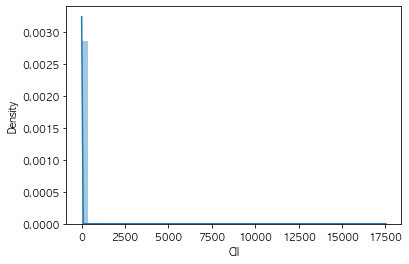

In [244]:
#CII 계산
import math
df['CII'] = df['CDBX'] / df['NVGTN_DIST'] / df['DDWGHT']
df = df[df['CII']!=math.inf]
sns.distplot(df['CII'])

In [319]:
#df.to_csv('항로선박전처리.csv', encoding='utf-8-sig', index=False)
df = pd.read_csv('항로선박전처리.csv')

<AxesSubplot:>

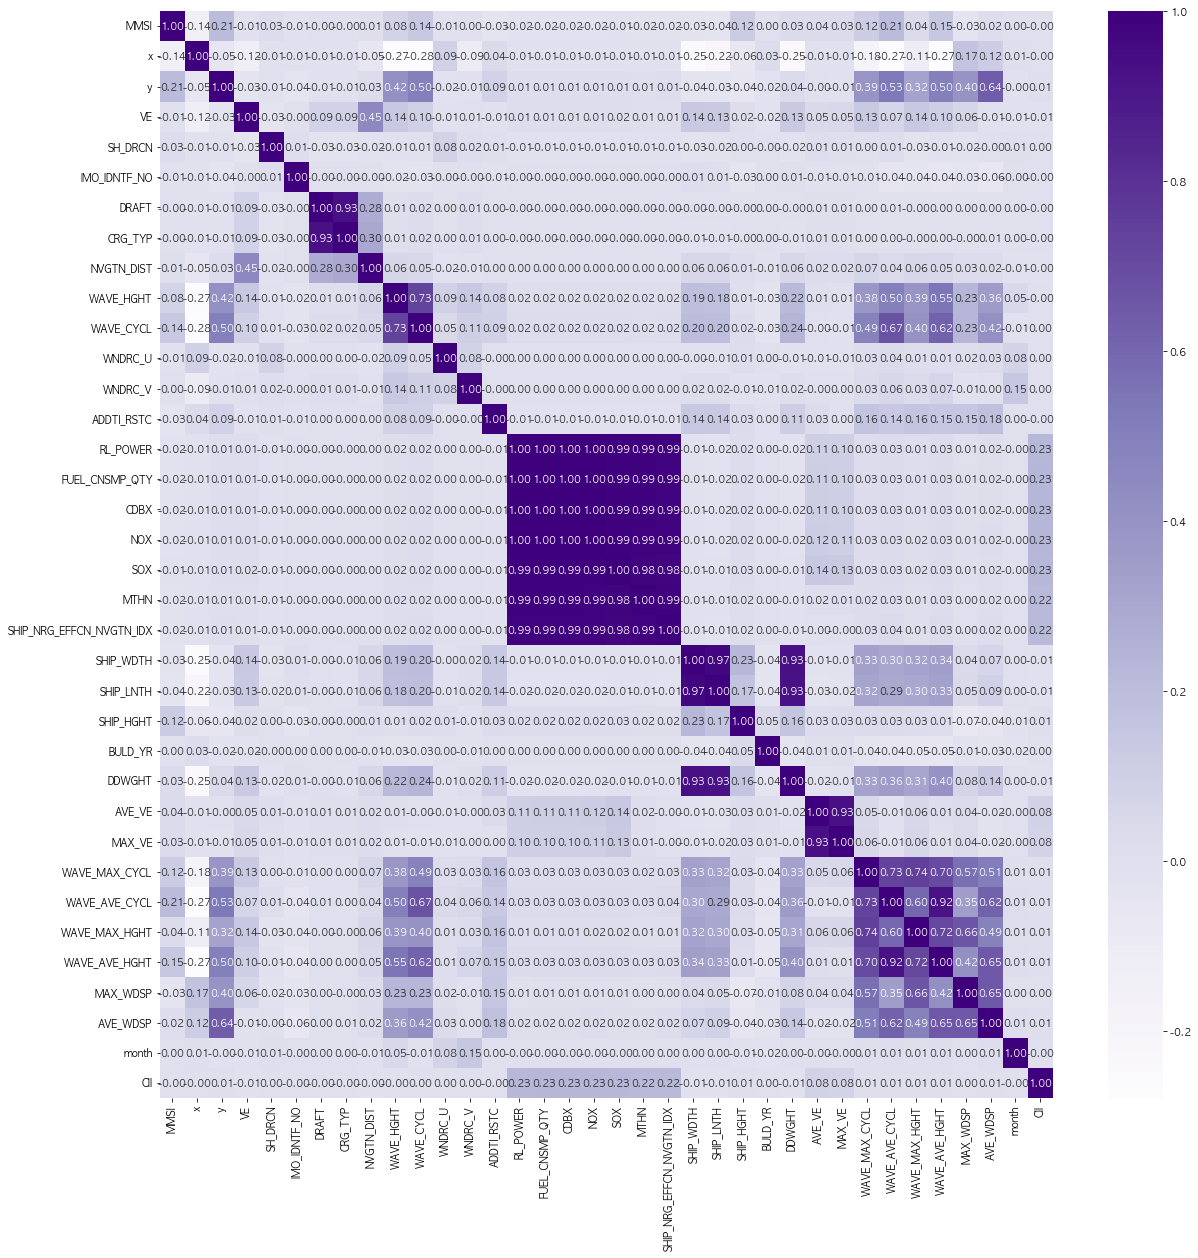

In [268]:
#상관계수 히트맵
plt.figure(figsize=(20,20))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', cmap=plt.cm.Purples)

In [320]:
#feature 정리
df2 = df[['CII', 'MMSI', 'IMO_IDNTF_NO', #key값 살려두기 
          'VE', 'SH_DRCN', 'CRG_TYP', 'NVGTN_DIST', #운행 정보
          'WAVE_HGHT', 'WAVE_CYCL', 'WNDRC_U', 'WNDRC_V', #항로 정보
          'ADDTI_RSTC', 'RL_POWER', 'FUEL_CNSMP_QTY', 'CDBX', 'SHIP_NRG_EFFCN_NVGTN_IDX', #연료 정보
          'SHIP_WDTH', 'SHIP_LNTH', 'SHIP_HGHT', 'BULD_YR', 'DDWGHT', 'SHIP_KIND', #선박 정보
          'AVE_VE', 'MAX_VE', 'WAVE_AVE_CYCL', 'WAVE_AVE_HGHT', 'AVE_WDSP', #해양 정보
          'date', 'month', 'cluster'
           ]]

<AxesSubplot:>

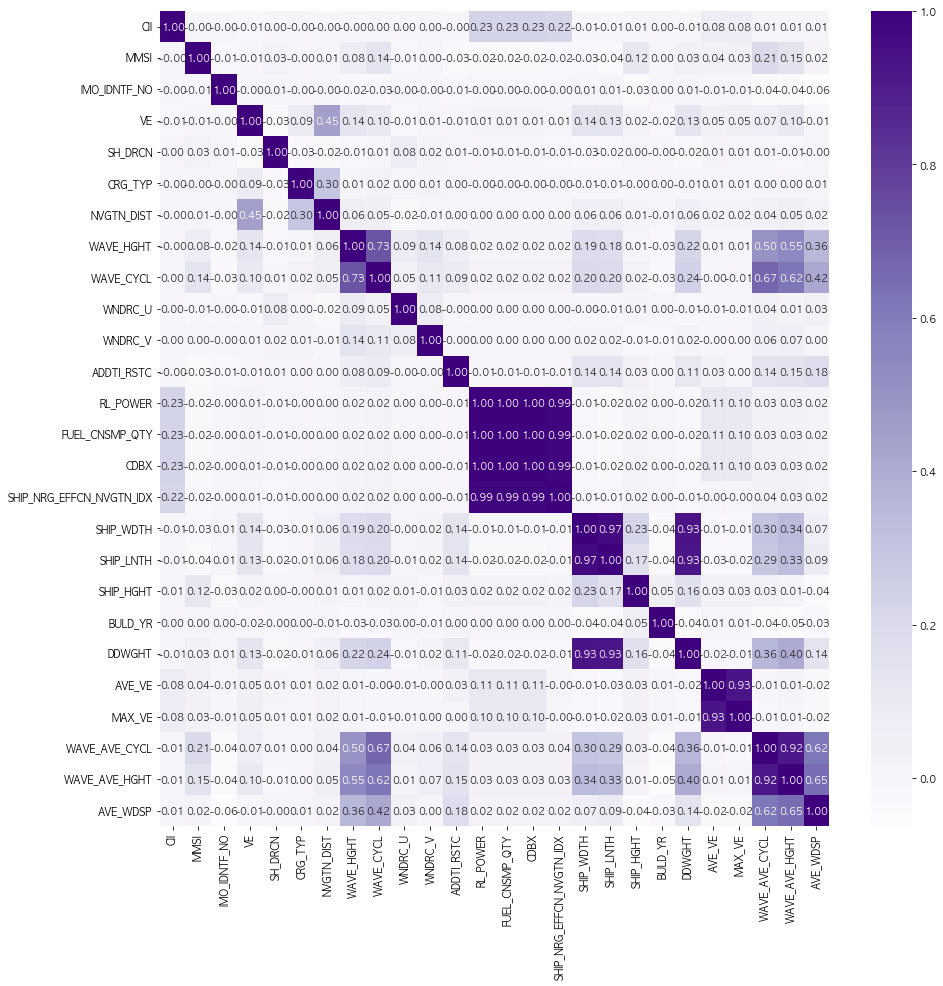

In [271]:
#상관계수 히트맵
plt.figure(figsize=(15,15))
sns.heatmap(data=df2.corr(), annot=True, fmt='.2f', cmap=plt.cm.Purples)

* 상관계수만으로 유의미한 변수를 찾기 어렵다.
* 해당 도메인 지식도 부족하므로 몇 가지 가설을 세워 CII에 영향을 미치는 변수를 확인하고자 한다.

<AxesSubplot:xlabel='CII', ylabel='Density'>

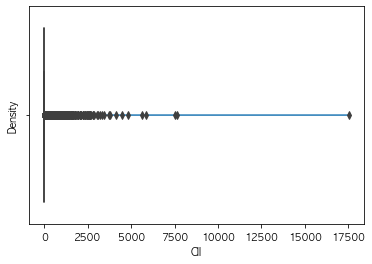

In [304]:
#CII 분포 확인
df.CII.describe()
plt.subplot(2,1,1)
sns.distplot(df['CII'])
plt.subplot(2,1,2)
sns.boxplot(df['CII'])

<AxesSubplot:xlabel='CII_log', ylabel='Density'>

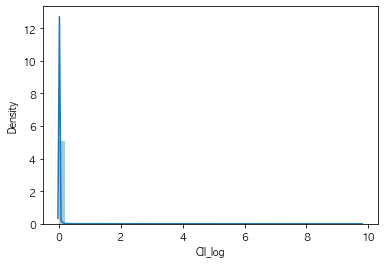

In [335]:
#CII 로그변환
df['CII_log'] = np.log1p(df['CII'])
df2['CII_log'] = np.log1p(df2['CII'])
sns.distplot(df2['CII_log'])

* CII 분포의 왜도가 극단적이므로 로그변환을 해주었다.

t-통계량: 0.2591201776916846 p-값: 0.7955425468216883


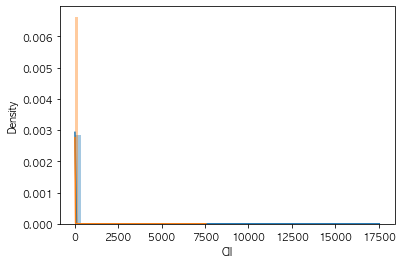

In [307]:
#가설1. 계절별 CII 차이가 존재할 것이다. - CII
df2['season'] = df2['month'].apply(lambda x: 'summer' if x in [6, 7] else 'spring')
df_A = df2[df2['season']=='spring']
df_B = df2[df2['season']=='summer']
sns.distplot(df_A['CII'])
sns.distplot(df_B['CII'])
t_stat, p_value = stats.ttest_ind(df_A['CII'], df_B['CII'], equal_var=True) 
print('t-통계량:', t_stat, 'p-값:', p_value)

t-통계량: -0.10496876997312919 p-값: 0.916400605880382


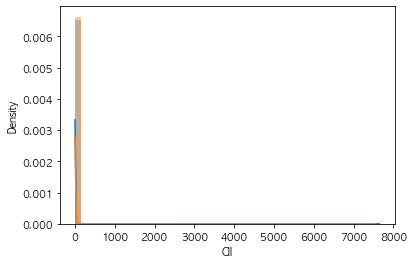

In [374]:
#가설1. 계절별 CII 차이가 존재할 것이다. - CII
def for_season(x):
    if x in [1, 2]:
        return 'winter'
    elif x in [6, 7]:
        return 'summer'
    else:
        return 'spring'

df2['season'] = df2['month'].apply(for_season)
df_A = df2[df2['season']=='spring']
df_B = df2[df2['season']=='summer']
sns.distplot(df_A['CII'])
sns.distplot(df_B['CII'])
t_stat, p_value = stats.ttest_ind(df_A['CII'], df_B['CII'], equal_var=True) 
print('t-통계량:', t_stat, 'p-값:', p_value)

t-통계량: -0.4838391877970822 p-값: 0.6285000825023013


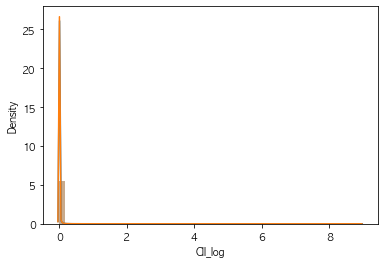

In [376]:
#가설1. 계절별 CII 차이가 존재할 것이다. - CII_log
sns.distplot(df_A['CII_log'])
sns.distplot(df_B['CII_log'])
t_stat, p_value = stats.ttest_ind(df_A['CII_log'], df_B['CII_log'], equal_var=True) 
print('t-통계량:', t_stat, 'p-값:', p_value)

t-통계량: -1.7403065297907374 p-값: 0.0818056165887979


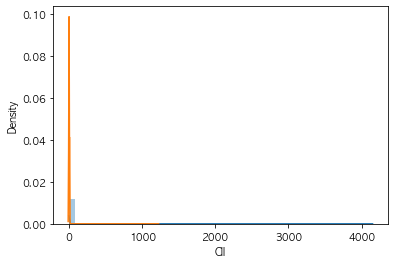

In [296]:
#가설2. 태평양과 필리핀해의 CII 차이가 존재할 것이다. - CII
df_A = df2[df2['cluster']=='태평양']
df_B = df2[df2['cluster']=='필리핀해']
sns.distplot(df_A['CII'])
sns.distplot(df_B['CII'])
t_stat, p_value = stats.ttest_ind(df_A['CII'], df_B['CII'], equal_var=True) 
print('t-통계량:', t_stat, 'p-값:', p_value)

t-통계량: 3.9958157677712323 p-값: 6.447798490489015e-05


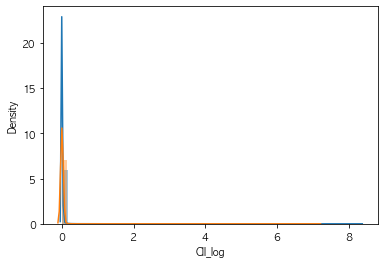

In [306]:
#가설2. 태평양과 필리핀해의 CII 차이가 존재할 것이다. - CII_log -> 유의
df_A = df2[df2['cluster']=='태평양']
df_B = df2[df2['cluster']=='필리핀해']
sns.distplot(df_A['CII_log'])
sns.distplot(df_B['CII_log'])
t_stat, p_value = stats.ttest_ind(df_A['CII_log'], df_B['CII_log'], equal_var=True)
print('t-통계량:', t_stat, 'p-값:', p_value)

In [314]:
#가설1. 월별로 CII가 차이날 것이다. - CII
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('CII ~ month', df2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
month,1.0,5.812289e+02,581.228936,1.011192,0.314618
Residual,1776764.0,1.021277e+09,574.795876,NaN,NaN


In [315]:
#가설1. 월별로 CII가 차이날 것이다. - CII_log -> 유의
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('CII_log ~ month', df2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
month,1.0,0.218502,0.218502,5.788806,0.016129
Residual,1776764.0,67065.108719,0.037746,NaN,NaN


In [329]:
#가설1. 월별로 CII가 차이날 것이다. - 사후검정(본페로니 교정)
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats
comp = MultiComparison(df2.CII_log, df2.month)
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
1,2,-0.0819,0.9347,1.0,False
1,3,1.0683,0.2854,1.0,False
1,4,0.2599,0.795,1.0,False
1,5,3.9453,0.0001,0.0017,True
1,6,2.6569,0.0079,0.1656,False
1,7,0.3319,0.74,1.0,False
2,3,1.1591,0.2464,1.0,False
2,4,0.3464,0.7291,1.0,False
2,5,4.072,0.0,0.001,True
2,6,2.7657,0.0057,0.1193,False


In [321]:
#가설3. 선박 종류별로 CII가 차이날 것이다. - CII
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('CII ~ SHIP_KIND', df2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
SHIP_KIND,13.0,8.998323e+04,6921.786843,12.043138,9.808989e-27
Residual,1776752.0,1.021187e+09,574.749441,NaN,NaN


In [324]:
#가설3. 선박 종류별로 CII가 차이날 것이다. - CII_log
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = ols('CII_log ~ SHIP_KIND', df2).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
SHIP_KIND,13.0,147.883013,11.375616,302.03857,0.0
Residual,1776752.0,66917.444208,0.037663,NaN,NaN


In [330]:
#가설4. 선박별로 CII가 차이날 것이다. - 사후검정(본페로니 교정)
from statsmodels.sandbox.stats.multicomp import MultiComparison
import scipy.stats
comp = MultiComparison(df2.CII_log, df2.SHIP_KIND)
result = comp.allpairtest(scipy.stats.ttest_ind, method='bonf')
result[0]

group1,group2,stat,pval,pval_corr,reject
Asphalt or Bitumen Tanker,Bunkering Tanker,5.4238,0.0,0.0,True
Asphalt or Bitumen Tanker,Chemical Tanker,-1.2496,0.2115,1.0,False
Asphalt or Bitumen Tanker,Crude Oil Tanker,7.9315,0.0,0.0,True
Asphalt or Bitumen Tanker,Floating Storage or Production,3.5042,0.0005,0.0417,True
Asphalt or Bitumen Tanker,General Cargo,-0.7947,0.4268,1.0,False
Asphalt or Bitumen Tanker,Inland Tanker,-3.9948,0.0001,0.0059,True
Asphalt or Bitumen Tanker,LPG Tanker,2.2873,0.0222,1.0,False
Asphalt or Bitumen Tanker,OIL PRODUCTS TANKER,1.7699,0.0768,1.0,False
Asphalt or Bitumen Tanker,Oil Products Tanker,-4.1899,0.0,0.0025,True
Asphalt or Bitumen Tanker,Oil or Chemical Tanker,-10.885,0.0,0.0,True


### 모델링

In [353]:
#!pip install catboost
#!pip install xgboost
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor,ExtraTreesRegressor
#from xgboost import XGBRegressor
#from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [358]:
#데이터 전처리
X_c = df2[['SHIP_KIND', 'cluster']]
X_n = df2.drop(['SHIP_KIND', 'cluster', 'date', 'CII_log'], axis=1)

#scaling
from sklearn.preprocessing import StandardScaler
sc = MinMaxScaler()
X_n = pd.DataFrame(sc.fit_transform(X_n), columns=X_n.columns)

#encoding
en = LabelEncoder()
X_c['SHIP_KIND'] = en.fit_transform(X_c['SHIP_KIND'])
X_c['cluster'] = en.fit_transform(X_c['cluster'])

#X/y split
df_ = pd.concat([X_n ,X_c], axis=1)
y = df_['CII']
X = df_.drop(['CII'], axis=1)

In [360]:
#모델링
print('모델 features:', features)
features = ['VE', 'SH_DRCN', 'CRG_TYP', 'NVGTN_DIST',
            'WAVE_HGHT', 'WAVE_CYCL', 'WNDRC_U', 'WNDRC_V', 'ADDTI_RSTC',
            'RL_POWER', 'FUEL_CNSMP_QTY', 'CDBX', 'SHIP_NRG_EFFCN_NVGTN_IDX',
            'SHIP_WDTH', 'SHIP_LNTH', 'SHIP_HGHT', 'BULD_YR', 'DDWGHT',
            'AVE_VE', 'MAX_VE', 'WAVE_AVE_CYCL', 'WAVE_AVE_HGHT', 'AVE_WDSP',
            'month']
X = X[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

모델 features: ['VE', 'SH_DRCN', 'CRG_TYP', 'NVGTN_DIST', 'WAVE_HGHT', 'WAVE_CYCL', 'WNDRC_U', 'WNDRC_V', 'ADDTI_RSTC', 'RL_POWER', 'FUEL_CNSMP_QTY', 'CDBX', 'SHIP_NRG_EFFCN_NVGTN_IDX', 'SHIP_WDTH', 'SHIP_LNTH', 'SHIP_HGHT', 'BULD_YR', 'DDWGHT', 'AVE_VE', 'MAX_VE', 'WAVE_AVE_CYCL', 'WAVE_AVE_HGHT', 'AVE_WDSP', 'month']


In [362]:
# (1) model selection
lr = LinearRegression()
enet = ElasticNet(random_state=42)
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)
ext = ExtraTreesRegressor(random_state=42)
ada = AdaBoostRegressor(random_state=42)
gbr = GradientBoostingRegressor(random_state=42)
#xgb = XGBRegressor(random_state=42)
#lgbm = LGBMRegressor(random_state=42)
cat = CatBoostRegressor(silent=True, random_state=42)

models = [lr, enet, dt, rf, ext, ada, gbr, cat]
for model in models:
    name = model.__class__.__name__
    scores = cross_val_score(model, X=X_train, y=y_train, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
    mae = (-1)*np.mean(scores) 
    print('Model %s - RMAE: %.4f' % (name, np.sqrt(mae))) 

Model LinearRegression - RMAE: 0.0065
Model ElasticNet - RMAE: 0.0057
Model DecisionTreeRegressor - RMAE: 0.0020
Model RandomForestRegressor - RMAE: 0.0018
Model ExtraTreesRegressor - RMAE: 0.0027
Model AdaBoostRegressor - RMAE: 0.0094
Model GradientBoostingRegressor - RMAE: 0.0029
Model CatBoostRegressor - RMAE: 0.0019


In [364]:
# (2) tuning
print(help(RandomForestRegressor))
params = {'n_estimators': [10, 50, 100],
          'max_depth': [3, 5, 7]}
grid = GridSearchCV(rf, param_grid=params, cv=5, scoring='neg_mean_absolute_error')
grid.fit(X_train, y_train)
print((-1)*grid.best_score_, grid.best_params_)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=1.0, max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators 

KeyboardInterrupt: 

In [363]:
# (3) final
#final = RandomForestRegressor(**grid.best_params_)
final = RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42)
final.fit(X_train, y_train)
final_pred = final.predict(X_test)
print(mean_absolute_error(final_pred, y_test)) 

1.0444108541924559e-05


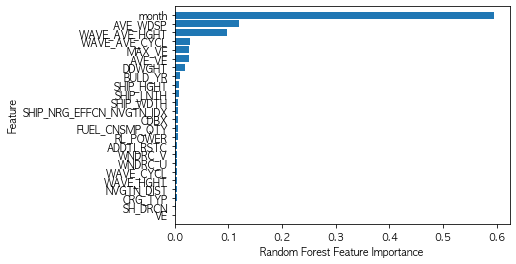

In [377]:
#Features Importance
def plot_feature_importance(model):
    n_features = X.shape[1]
    plt.barh(np.arange(n_features), sorted(model.feature_importances_), align="center")
    plt.yticks(np.arange(n_features), X.columns)
    plt.xlabel("Random Forest Feature Importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)
    
plot_feature_importance(final)

### Q2 전처리(해양별 선박 3개)

In [ ]:
import pandas as pd
df = pd.read_csv('항로선박전처리.csv')

res1 = df[(df['MMSI']==368445000) | (df['MMSI']==338227000)| (df['MMSI']==374245000)] #태평양
res2 = df[(df['MMSI']==477147100) | (df['MMSI']==414491000)| (df['MMSI']==477854300)] #필리핀

#남대서양
idx = df[df['cluster']=='남대서양']['MMSI'].value_counts()[:3].index
res = pd.DataFrame()
for i in idx:
    tmp = df[df['MMSI']==i]
    res = pd.concat([res, tmp], axis=0)
res3 = res

#북대서양
idx = df[df['cluster']=='북대서양']['MMSI'].value_counts()[:3].index
res = pd.DataFrame()
for i in idx:
    tmp = df[df['MMSI']==i]
    res = pd.concat([res, tmp], axis=0)
res4 = res
    
#북대서양
idx = df[df['cluster']=='인도양']['MMSI'].value_counts()[:3].index
res = pd.DataFrame()
for i in idx:
    tmp = df[df['MMSI']==i]
    res = pd.concat([res, tmp], axis=0)
res5 = res

res = pd.concat([res1, res2, res3, res4, res5], axis=0)
res.to_csv('해양별선박3대.csv', encoding='utf-8-sig', index=False)